## Odev 3

#### 1. Question

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 170)

In [3]:
df = pd.read_csv("persona.csv")
df.head()

,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PRICE    5000 non-null   int64 
 1   SOURCE   5000 non-null   object
 2   SEX      5000 non-null   object
 3   COUNTRY  5000 non-null   object
 4   AGE      5000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 234.4+ KB


In [5]:
def check_df(dataframe, head=5):
    print("SHAPE : \n{}".format(dataframe.shape))
    print("-------------------"*3)

    print("TYPES : \n{}".format(dataframe.dtypes))
    print("-------------------"*3)

    print("HEAD : \n{}".format(dataframe.head(head)))
    print("-------------------"*3)

    print("TAIL : \n{}".format(dataframe.tail(head)))
    print("-------------------"*3)

    print("NaN COLUMNS : \n{}".format(df.isnull().any()))
    print("-------------------"*3)

    print("DESCRIBE : \n{}".format(dataframe.describe().T))

In [6]:
check_df(df)

SHAPE : 
(5000, 5)
---------------------------------------------------------
TYPES : 
PRICE       int64
SOURCE     object
SEX        object
COUNTRY    object
AGE         int64
dtype: object
---------------------------------------------------------
HEAD : 
   PRICE   SOURCE   SEX COUNTRY  AGE
0     39  android  male     bra   17
1     39  android  male     bra   17
2     49  android  male     bra   17
3     29  android  male     tur   17
4     49  android  male     tur   17
---------------------------------------------------------
TAIL : 
      PRICE   SOURCE     SEX COUNTRY  AGE
4995     29  android  female     bra   31
4996     29  android  female     bra   31
4997     29  android  female     bra   31
4998     39  android  female     bra   31
4999     29  android  female     bra   31
---------------------------------------------------------
NaN COLUMNS : 
PRICE      False
SOURCE     False
SEX        False
COUNTRY    False
AGE        False
dtype: bool
----------------------------------

In [7]:
df[df.columns].nunique()

PRICE       6
SOURCE      2
SEX         2
COUNTRY     6
AGE        46
dtype: int64

In [8]:
df["AGE_RANGE"] = ["teen" if rng < 40 else "old" for rng in df["AGE"]]

In [9]:
df.head()

,PRICE,SOURCE,SEX,COUNTRY,AGE,AGE_RANGE
0,39,android,male,bra,17,teen
1,39,android,male,bra,17,teen
2,49,android,male,bra,17,teen
3,29,android,male,tur,17,teen
4,49,android,male,tur,17,teen


In [10]:
cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
cat_cols

['SOURCE', 'SEX', 'COUNTRY', 'AGE_RANGE']

In [11]:
num_but_cat = [col for col in df.columns if df[col].nunique() < 20 and df[col].dtypes != "O"]
num_but_cat

['PRICE']

In [12]:
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and df[col].dtypes == "O"]
cat_but_car

[]

In [13]:
cat_cols = cat_cols + num_but_cat
cat_cols

['SOURCE', 'SEX', 'COUNTRY', 'AGE_RANGE', 'PRICE']

In [14]:
cat_cols = [col for col in cat_cols if col not in cat_but_car]
cat_cols

['SOURCE', 'SEX', 'COUNTRY', 'AGE_RANGE', 'PRICE']

In [15]:
num_cols = [col for col in df.columns if df[col].dtypes != 'O']
num_cols

['PRICE', 'AGE']

In [17]:
df[cat_cols].nunique()

SOURCE       2
SEX          2
COUNTRY      6
AGE_RANGE    2
PRICE        6
dtype: int64

In [18]:
def num_summary(dataframe, numerical_col, plot=False):
    print("--------------------" + numerical_col + "--------------------------")

    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]

    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        sns.displot(dataframe[numerical_col], bins = 55, kde = True)
        plt.xlabel(numerical_col)
        plt.title(numerical_col + " HIST")
        plt.show()
        
        plt.title(numerical_col + " BOXPLOT")
        sns.boxplot(x = numerical_col ,data = dataframe)
        plt.show()

--------------------PRICE--------------------------
count    5000.000000
mean       34.132000
std        12.464897
min         9.000000
5%         19.000000
10%        19.000000
20%        19.000000
30%        29.000000
40%        29.000000
50%        39.000000
60%        39.000000
70%        39.000000
80%        49.000000
90%        49.000000
95%        49.000000
99%        59.000000
max        59.000000
Name: PRICE, dtype: float64


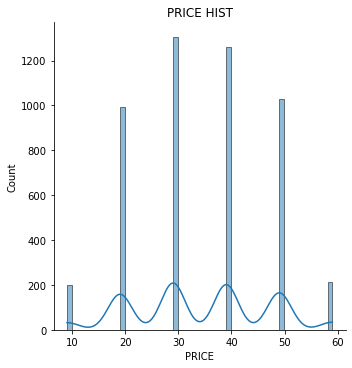

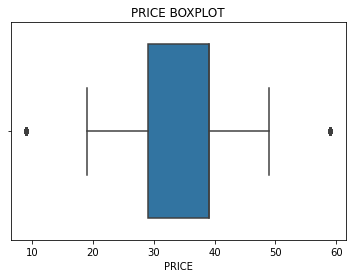

--------------------AGE--------------------------
count    5000.000000
mean       23.581400
std         8.995908
min        15.000000
5%         15.000000
10%        15.000000
20%        16.000000
30%        17.000000
40%        19.000000
50%        21.000000
60%        23.000000
70%        26.000000
80%        30.000000
90%        36.000000
95%        43.000000
99%        53.000000
max        66.000000
Name: AGE, dtype: float64


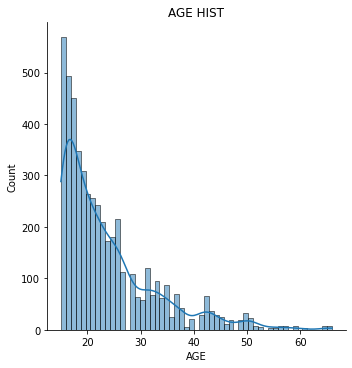

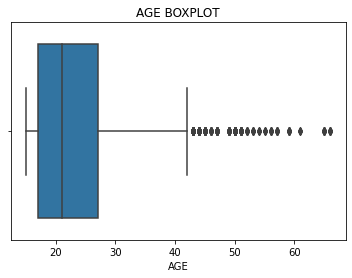

In [19]:
for col in num_cols:
    num_summary(df, col, plot=True)

 #### "AGE" değişikeni için histogram grafiğine baktığımızda verisetimizin çoğunluklu olarak genç kullanıcılardan oluştuğunu gözlemliyoruz. 
 #### "PRICE" değişkenimizin histogram grafiğine baktığımızda fiyatlandırmanın sabit aralıklarda olduğu için. kategorik bir değişken olduğunu gözlemliyoruz.

         SOURCE  Ratio
android    2974  59.48
ios        2026  40.52


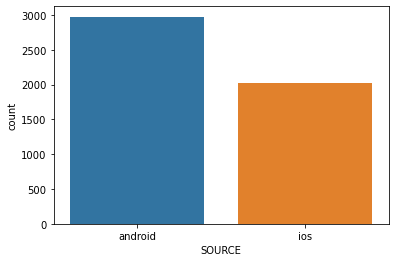

---------------------------------------------------------
---------------------------------------------------------
         SEX  Ratio
female  2621  52.42
male    2379  47.58


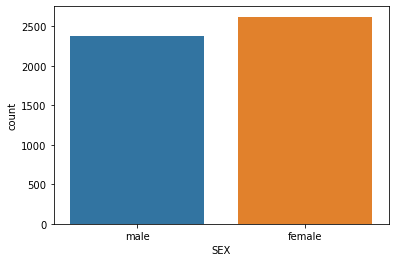

---------------------------------------------------------
---------------------------------------------------------
     COUNTRY  Ratio
usa     2065  41.30
bra     1496  29.92
deu      455   9.10
tur      451   9.02
fra      303   6.06
can      230   4.60


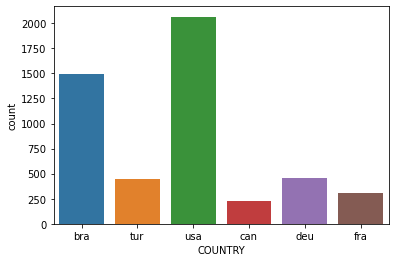

---------------------------------------------------------
---------------------------------------------------------
      AGE_RANGE  Ratio
teen       4627  92.54
old         373   7.46


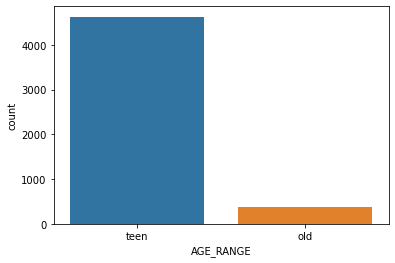

---------------------------------------------------------
---------------------------------------------------------
    PRICE  Ratio
29   1305  26.10
39   1260  25.20
49   1031  20.62
19    992  19.84
59    212   4.24
9     200   4.00


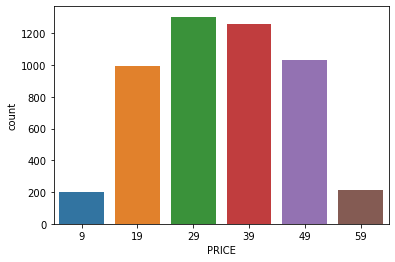

---------------------------------------------------------
---------------------------------------------------------


In [20]:
def cat_summary(dataframe, col_name, plot=False):

    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()
        
    print("-------------------"*3)
    print("-------------------"*3)

for col in cat_cols:
    cat_summary(df, col, plot=True)

#### Count grafiklerine baktığımızda verimizde Android kullanıcılarının IOS kullanıcılarına göre biraz fazla olduğunu gözlemliyoruz.
#### Verimizde cinsiyet dağılımının birbirine yakın olduğunu gözlemlitoruz.
#### Verimize "USA" ve "BRA" ülkelerinden katılımın fazla olduğunu gözlemliyoruz.
#### "PRICE" değişkenine baktığımızda orta segment telefon kullanıcıların yoğunluklu olduğunu gözlemliyoruz.